# Вводные по проекту 

**Проблема:**
Развлекательное приложение Procrastinate Pro+ последние несколько месяцев терпит убытки, несмотря на огромные вложения в рекламу. 

**Цель:** Разобраться в причинах и помочь компании выйти в плюс.

**Задачи:**
   * откуда приходят пользователи и какими устройствами они пользуются,
   * сколько стоит привлечение пользователей из различных рекламных каналов;
   * сколько денег приносит каждый клиент,
   * когда расходы на привлечение клиента окупаются,
   * какие факторы мешают привлечению клиентов.

**Данные для анализа:** Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
   * лог сервера с данными об их посещениях,
   * выгрузка их покупок за этот период,
   * рекламные расходы.

## Выгрузка данных

In [1]:
import pandas as pd
import seaborn as sns
from io import BytesIO
import requests
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
spreadsheet_costs = '1Pd8cGa-vjX16u9JmwLi3BdWHiAZNDqup1HywXEZiccA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_costs)
r = requests.get(file_name)
costs = pd.read_csv(BytesIO(r.content))

spreadsheet_orders = '1T8211rh2E9fuf8cI7SMSyDDLzmHsW5ZYZApoAS3H4lA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_orders)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content))

spreadsheet_visits = '1rvdR44qhgXuF7jVEF05y0xR7-eWxlUhyi0zq-4TMszQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_visits)
r = requests.get(file_name)
visits = pd.read_csv(BytesIO(r.content))


In [3]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


## Предобработка данных

### Названия колонок

Переименуем колонки - преведем все к единому формату

In [9]:
costs.columns = 'dt', 'channel', 'cost'
orders.columns = 'user_id', 'event_dt', 'revenue'
visits.columns = 'user_id', 'region', 'device', 'channel', 'session_start', 'session_end'

### Тип данных

Во всех датасетах колонки с указанием даты предоставлены в виде типа данных `object`. Переведем данные в тип `datetime`

In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [11]:
costs.head()

,dt,channel,cost
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [13]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


### Дубликаты и пропуске

Явные пропуски отсутствуют, так как кол=во наблюдений в каждом параметре внутри одного датафрейма совпадает. Проверим наличие явных дубликатов

In [14]:
costs.duplicated().sum()

0

In [15]:
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

### Аномальные значения

In [17]:
costs['cost'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: cost, dtype: float64

In [18]:
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

In [19]:
# функция для создания пользовательских профилей 

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['cost'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 


In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Создание пользовательских профилей 
Определение минимальной и максимальной даты привлечения пользователей

In [27]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [28]:
min_date = profiles['first_ts'].min()
min_date

Timestamp('2019-05-01 00:00:41')

In [29]:
max_date = profiles['first_ts'].max()
max_date

Timestamp('2019-10-27 23:59:04')

### Пользователи по странам
Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [30]:
# Кол-во пользователей по странам
profiles_by_countries = (profiles.groupby('region')
                         .agg({'region': 'count'})
                         .rename(columns={'region': 'count_user'})
                         .reset_index()
                         .sort_values(by='count_user'))
profiles_by_countries

,region,count_user
1,Germany,14981
0,France,17450
2,UK,17575
3,United States,100002


In [31]:
# Кол-во платящих пользователей по странам
payers_by_countries = (profiles.query('payer == True')
                       .groupby('region')
                       .agg({'region': 'count'})
                       .rename(columns={'region': 'count_user'})
                       .reset_index()
                       .sort_values(by='count_user'))
payers_by_countries

,region,count_user
1,Germany,616
0,France,663
2,UK,700
3,United States,6902


In [32]:
profiles_by_countries['payer_share'] = ( payers_by_countries['count_user'] / profiles_by_countries['count_user'] * 100).sort_values()
profiles_by_countries

,region,count_user,payer_share
1,Germany,14981,4.111875
0,France,17450,3.799427
2,UK,17575,3.982930
3,United States,100002,6.901862


Наибольшая доля платящих пользователей приходится на США(`6.9%`). Наимньшая доля платящей аудитории во Франции (`3.8%`) и Великобритании (`4%`)

###  Пользователи по типу устройства
Изучить какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [33]:
profiles_by_device = (profiles.groupby('device')
    .agg({'device': 'count'})
    .rename(columns={'device': 'count_user'})
    .reset_index())
profiles_by_device

,device,count_user
0,Android,35032
1,Mac,30042
2,PC,30455
3,iPhone,54479


In [34]:
payers_by_device = (profiles.query('payer == True')
                       .groupby('device')
                       .agg({'device': 'count'})
                       .rename(columns={'device': 'count_user'})
                       .reset_index())
payers_by_device

,device,count_user
0,Android,2050
1,Mac,1912
2,PC,1537
3,iPhone,3382


In [35]:
profiles_by_device['payer_share'] = ( payers_by_device['count_user'] / profiles_by_device['count_user'] * 100).sort_values()
profiles_by_device

,device,count_user,payer_share
0,Android,35032,5.851793
1,Mac,30042,6.364423
2,PC,30455,5.046790
3,iPhone,54479,6.207897


Наиболее популярные устройства, через которые клиенты пользуются сервисом - iPhone и MAC. Среди пользователей с другими ОС наблюдаем чуть меньшую долю платящей аудитории

###  Рекламные источники привлечения 
и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [36]:
profiles_by_channel = (profiles.groupby('channel')
    .agg({'channel':'count'})
    .rename(columns={'channel': 'count_user'})
    .reset_index())
profiles_by_channel

,channel,count_user
0,AdNonSense,3880
1,FaceBoom,29144
2,LeapBob,8553
3,MediaTornado,4364
4,OppleCreativeMedia,8605
5,RocketSuperAds,4448
6,TipTop,19561
7,WahooNetBanner,8553
8,YRabbit,4312
9,lambdaMediaAds,2149


In [37]:
payers_by_channel = (profiles.query('payer == True')
                       .groupby('channel')
                       .agg({'channel': 'count'})
                       .rename(columns={'channel': 'count_user'})
                       .reset_index())
payers_by_channel

,channel,count_user
0,AdNonSense,440
1,FaceBoom,3557
2,LeapBob,262
3,MediaTornado,156
4,OppleCreativeMedia,233
5,RocketSuperAds,352
6,TipTop,1878
7,WahooNetBanner,453
8,YRabbit,165
9,lambdaMediaAds,225


In [38]:
profiles_by_channel['payer_share'] = ( payers_by_channel['count_user'] / profiles_by_channel['count_user'] * 100).sort_values()
profiles_by_channel

,channel,count_user,payer_share
0,AdNonSense,3880,11.340206
1,FaceBoom,29144,12.204914
2,LeapBob,8553,3.063253
3,MediaTornado,4364,3.574702
4,OppleCreativeMedia,8605,2.707728
5,RocketSuperAds,4448,7.913669
6,TipTop,19561,9.600736
7,WahooNetBanner,8553,5.296387
8,YRabbit,4312,3.826531
9,lambdaMediaAds,2149,10.469986


Больше всего платящих пользователей приходит через каналы `FaceBoom, AdNonSense, lambdaMediaAds`

**Выводы**

Сформировали профили пользователей и вычислили общую аудиторию и доли платящей аудитории по странам, типам устройст и рекламным каналам. 

Больше всего платящих в США - 6.9%     
По каналам больше всего платящих привлеченых  FaceBoom - 12,2%, так же в лидерах AdNonSense- 11.34% и lambdaMediaAds - 10.47%


## Маркетинг


###  Расходы на маркетинг
Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [39]:
costs['cost'].sum()

105497.30000000002

In [40]:
costs.groupby('channel').sum().sort_values(by='cost', ascending=False)

,cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [41]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   cost     1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [42]:
costs['dt'] = pd.to_datetime(costs['dt']) 

Text(0, 0.5, 'Затраты')

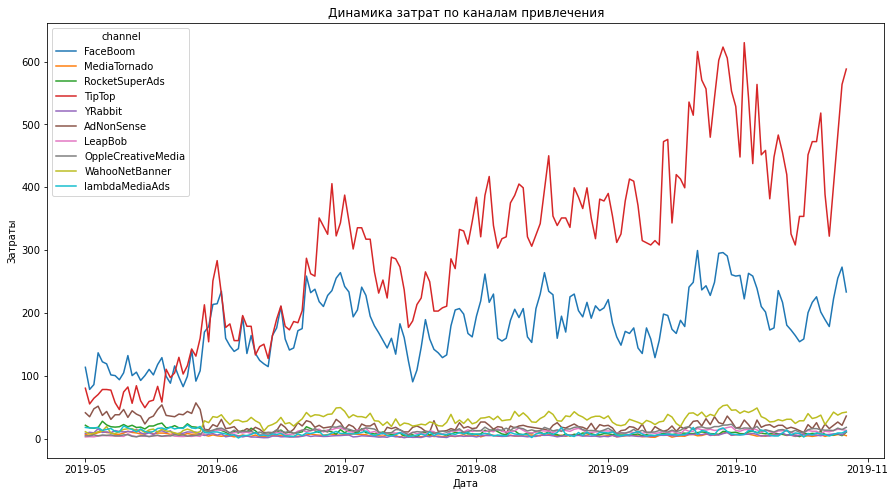

In [43]:
plt.figure(
    figsize=(15, 8)
)  # Важно! Этот код нужно писать до момента создания графика
plot = sns.lineplot(
    x='dt', y='cost', hue='channel', data=costs
) 

# Название графика и осей

plot.set_title("Динамика затрат по каналам привлечения")
plot.set_xlabel('Дата')
plot.set_ylabel('Затраты')

Топ-3 канала по количеству затрат на рекламу:

   * TipTop	- 54751.30
   
   * FaceBoom -	32445.60
   
   * WahooNetBanner - 5151.00
   
   
На графике виден растущий тренд в расходах на рекламу у TipTop и менее активный растущий тренд у FaceBoom.  Кроме того, наблюдаются повышенные траты в начале каждого месяца, и  дальнейшее сниженные трат в середине и ближе к концу месяца.   


### Стоимость привлечения

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний `CAC` на одного пользователя для всего проекта и для каждого источника трафика. 

При создании профилей пользователей добавили колонку `acquisition_cost` с указанием затрат на привлечение  пользователя

Исключим из анализа CAC и окупаемости рекламы органических пользователей, так как на них не затрачивался бюджет 

In [44]:
profiles_2 = profiles.query('channel != "organic"')
profiles_2.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


In [45]:
profiles_2['acquisition_cost'].mean()

1.127481323942928

In [ ]:
profiles_2.groupby('channel')['acquisition_cost'].mean().to_frame().sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


В средняя стоимость привлечения одного пользователя - `1.13`

Если взглянуть на стоимость зависимости от канала привлечения, то картина отличается. 
Самым дорогая стоимость привлечения через `TipTop` - `2.8`

В данном разделе мы ознакомились с общими затратами на рекламу для всего проекта и в зависимости от каналов привлечения. 
Нашли средний `CAC` также для одного пользователя всего проекта и с разбивкой по каналам привлечения.  

Далее нам предстоит оценить, насколько окупаются затраты приложения на рекламу по всему проекту и по отдельным каналам.  

## Оценка окупаемости рекламы

### Общая окупаемость рекламы 
Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14)    

In [ ]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

По графикам можно сделать следующие выводы:

   * Затраты на рекламу не окупаются. ROI в конце 2 недель — чуть выше 80%. Нужно понять, из-за чего реклама не окупается, и как повысить этот показатель. 
   * CAC возрастает. Значит, рекламный бюджет увеличивется со временем. Почему и за счет каких каналов/стран?
   * LTV достаточно стабилен. Наблюдаем повторяющиеся колебания. Вспомним, что траты на рекламу возрастали в начале каждого месяца. В целом, качество пользователей не ухудшается.

Чтобы разобраться в причинах низкого показателя окупаемости, пройдёмся по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Окупаемость рекламы с разбивкой по рекламным каналам
Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Пострим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)


In [ ]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

С разбивкой видно какие каналы эффективнее.

Вот что говорят графики:

   * Реклама окупается, но не во всех каналах. ROI у AdNonSense, FaceBoom и TipTop меньше 100%. Значит акцентируем свое внимание на этих трех каналах.
   * С наибольшим профитом окупился канал YRabbit, достигая пика окупаемости к середине июля.    
   * Практически у всех каналов стоимость привлечения стабильна. Сильно выбивается из общей картины резкий рост стоимости привлечения у TipTop. Действительно, у TipTop и затраты на рекламу сильно росли в течение рассматриваемого периода.
   * Самый волатильный канал по динамике LTV - lambda_MediaAdsLTV, но при этом этот же канал достигает самых высоких показателей LTV. 
  

###  Окупаемость рекламы с разбивкой по странам
Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
Опишите обнаруженные проблемы и напишите промежуточные выводы.

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)


In [ ]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

Вот что говорят графики:

   * Реклама окупается во всех регионах кроме США. При том наилучшая окупаемость наблюдается в Великобритании (более 160%), у Франции и Германии окупаемость практически одинакова и почти достигает 150%. 
   * Окупаемость США превышала 100% в мае, после чего пошла вниз, это вероятнее всего связано с тем, что стоимость привлечения пользователей из США резко стала возрастать в июне. Из прошлого пункта вспомним, что динаммика стоимости росла сильно у канала TipTop. Нужно проверить, из каких стран приводят пользователей через TipTop.
   * Наиболее высокий показатель LTV демонстрирует США. В целом у всех стран наблюдается небольшая волатильность динамики LTV, но придерживаются примерно единого уровня.
  

Сгруппировали `profiles` по странам и рекламным каналам. Видим, что для пользователей Европы и США использовались различные рекламные каналы. 

Такие каналы, как FaceBoom и TipTop применялись только на аудиторию США. Канал AdNonSense применялся для стран Европы. 

Значит рост стоимости привлечения пользователей из США напрямую связан с ростом рекламы на канале TikTop

In [ ]:
profiles_2.groupby(['region', 'channel']).agg({'user_id': 'count'})

### Конверсия и удержание с разбивкой по устройствам, странам, рекламным каналам
Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.


Окупается ли реклама в целом?
Какие устройства, страны и каналы могут снижать окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?
Опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Конверсия и удержание по устройствам

In [ ]:
#конверсия по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, 14) 

In [ ]:
# удержание по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14) 

   * Конверсия у пользователей MAC наиболее высокая, в то время как пользователи PC с другмими ОС показывают наименьший уровень конверсии.
   * Хотя пользователи PC менее охотно платят за приложение, но они показывают самый высокий показатель удержания

#### Конверсия и удержание по странам

In [ ]:
#конверсия по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, 14)

In [ ]:
# удержание по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14) 

   * Конверсия пользователей из США сильно выделяется на фоне других стран
   * Но при этом у клиентов из США стабильно ниже показатель удержания. 
   

#### Конверсия и удержание по рекламным каналам

In [ ]:
# конверсия рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14)

In [ ]:
# удержание по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, datetime(2019, 10, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14) 

   * AdNonSense и FaceBoom хуже других каналов удерживают привлеченых потребителей.  
   * Одновременно с этим именно эти каналы показывают наибольшие значения конверсии

Возможно реклама размещенная на этих каналах цепляет потребителя, но дезинформирует, преувеличивает положительные особенности приложения. 
Поэтому пользователи активно переходят из этих каналов и совершают платные действия, но быстро разочаровываются и уходят из приложения. 

## Выводы

### Причины неэффективности

ROI ниже 100% у TipTop, FaceBoom и  AdNonSense. 

**TipTop** - рекламный канал для пользователей из США. Второй источник по кол-ву привлеченных пользователей (19561 человека).

Основные проблемы:
   * Наиболшие затраты на рекламу среди всех каналов
   * Затраты на привлечение новых пользователей растут с каждым месяцем. Средняя стоимость привлечения (acquisition_cost) пользователя из TipTop равна 2.8 по отношению к среднему значению 0.7
    
**Faceboom** - рекламный канал для пользователей из США. Главные источник по кол-ву привлеченных пользователей (29144 человека).

Основные проблемы:
   * Высокие затраты на рекламу среди всех каналов.
   * Затраты на привлечение пользователей выше среднее. acquisition_cost FaceBoom равен 1.1.
   * FaceBoom хуже других каналов удерживают привлеченых потребителей

**AdNonSense** - рекламный канал для пользователей из Европы. 
   
Основные проблемы:
   * В Европе на этот канал приходится наибольшее кол-во затрат на рекламу
   * AdNonSense на равне с Faceboom плохо удерживают привлеченых потребителей
   
   
У обоих каналов `FaceBoom` и `AdNonSense` отличные показатели конверсии. То есть люди охотно реагируют на рекламу и производят платные действия в приложении. Однако, очень быстро эти пользователи покадают приложение.   

Также ROI ниже 100% у пользователей из США, но это связано с тем, что два самых неокупаемых канала (TipTop и FaceBoom) работают как раз для жителей США.  


### Рекомендации

Для улучшния эффективности рекламы стоит в первую очередь разобраться с работой самых убыточных каналов рекламы TipTop, FaceBoom и AdNonSense.

   * Нужно выяснить чем вызван постоянный рост затрат на рекламу в `TipTop` и по возможности снизить траты, или уменьшить вложения в данный канал. Так как мы можем увидеть, что от увеличения вложений конверсия или качество удержания клиентов не улучшилось
   
   
   * У `FaceBoom` и `AdNonSense` наблюдаются схожие истории. Рекомендуется проверить качество и содержание рекламы, размещеной на этих каналах. Выявить, чем реклама на данных каналах отличается от дургой рекламы. Возможно реклама дезинформмирует пользователей.
   * Если не получается найти явных особенностей рекламы, которые могут вводить пользователей в заблуждений, то рекомендуется снизить затраты на эти каналы рекламы. 
   
   
   * Освободившиеся деньги рекомендуется вкладывать в каналы, которые на данный момент более эффективны для бизнеса. 
   Например, у `lambdaMediaAds` высокая конверия и удержание и один из наиболее высоких показателей ROI 
   
 